In [1]:
from lets_plot import *


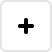
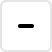
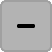
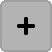
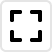
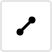
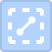
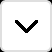
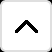
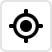
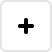
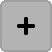
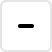
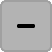
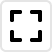
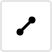
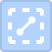
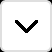
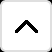
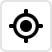

In [2]:
LetsPlot.setup_html()

## Target use case

In [3]:
data = {
    'x': [0, 1, 9, 10],
    'y': [0, 19, 1, 0],
}

In [4]:
ggplot(data, aes('x', 'y')) + \
    geom_bin2d(binwidth=[10, 10], size=.5) + \
    geom_point(color="red", size=5, manual_key=layer_key("Raw data")) + \
    geom_point(color="orange", stat="bin2d", binwidth=[10, 10], manual_key=layer_key("Bin2d centers"))

## Other tests

### Bin2d

In [5]:
def get_bin2d_plot(data, bins=None, binwidth=None, width=None, drop=None):
    title = ""
    if drop is not None:
        "drop={0}\n".format(drop)
    if bins is None:
        title += "default bins"
    else:
        title += "bins={0}".format(bins)
    if binwidth is None:
        title += "\ndefault binwidth"
    else:
        title += "\nbinwidth={0}".format(binwidth)
    if width is None:
        title += "\ndefault width"
    else:
        title += "\nwidth={0}".format(width)
    return ggplot(data, aes('x', 'y')) + \
        geom_bin2d(bins=bins, binwidth=binwidth, width=width, drop=drop, alpha=1 if drop is None else .5,
                   size=.5, color="white", show_legend=False,
                   tooltips=layer_tooltips().line("(^x, ^y)")) + \
        scale_x_continuous(breaks=list(range(min(data['x']), max(data['x']) + 1))) + \
        ggtitle(title)

In [6]:
bin2d_data = {
    'x': [0, 0, 8, 8],
    'y': [0, 8, 0, 8],
}

gggrid([
    get_bin2d_plot(bin2d_data),
    get_bin2d_plot(bin2d_data, width=8),
    get_bin2d_plot(bin2d_data, bins=[5, 5]),
    get_bin2d_plot(bin2d_data, bins=[5, 5], width=2),
    get_bin2d_plot(bin2d_data, binwidth=[2, 2]),
    get_bin2d_plot(bin2d_data, binwidth=[2, 2], width=2),
], ncol=2) + ggsize(1000, 1000)

In [7]:
gggrid([
    get_bin2d_plot(bin2d_data, drop=False),
    get_bin2d_plot(bin2d_data, drop=False, width=8),
    get_bin2d_plot(bin2d_data, drop=False, bins=[5, 5]),
    get_bin2d_plot(bin2d_data, drop=False, bins=[5, 5], width=2),
    get_bin2d_plot(bin2d_data, drop=False, binwidth=[2, 2]),
    get_bin2d_plot(bin2d_data, drop=False, binwidth=[2, 2], width=2),
], ncol=2)

### Tile

In [8]:
def get_tile_plot(data, width_unit=None, width=None):
    title = ""
    if width_unit is None:
        title += "default width_unit"
    else:
        title += "width_unit={0}".format(width_unit)
    if width is None:
        title += "\ndefault width"
    else:
        title += "\nwidth={0}".format(width)
    return ggplot(data, aes('x', 'y')) + \
        geom_tile(width_unit=width_unit, width=width,
                  size=.5, color="white", show_legend=False,
                  tooltips=layer_tooltips().line("(^x, ^y)")) + \
        scale_x_continuous(breaks=list(range(min(data['x']), max(data['x']) + 1))) + \
        ggtitle(title)

In [9]:
tile_data1 = {
    'x': [0, 0, 8, 8],
    'y': [0, 8, 0, 8],
}

gggrid([
    get_tile_plot(tile_data1),
    get_tile_plot(tile_data1, width=.5),
    get_tile_plot(tile_data1, width_unit='identity'),
    get_tile_plot(tile_data1, width_unit='identity', width=2),
], ncol=2)

In [10]:
tile_data2 = {
    'x': [0, 24, 8, 32],
    'y': [0, 4, 0, 4],
}

gggrid([
    get_tile_plot(tile_data2),
    get_tile_plot(tile_data2, width=.5),
    get_tile_plot(tile_data2, width_unit='identity'),
    get_tile_plot(tile_data2, width_unit='identity', width=2),
], ncol=2)